# ALGORITMOS DE BUSUQEDA 

## PREPARACION DE DATOS

### IMPORTAR LIBRERIAS

In [48]:
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para graficar
import pandas as pd #libreria de manejo de datos
import scipy as sp #libreria python cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from community import community_louvain
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
import openpyxl


### Creacion DataFrame, red y Caracteristicas

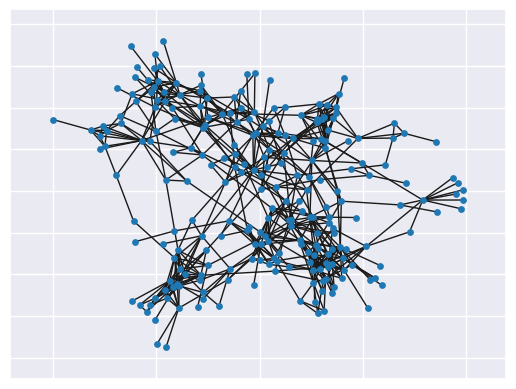

In [49]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red
plt.show()

In [50]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


In [51]:
#matriz de adyacencia
adyacencia=nx.adjacency_matrix(G).todense()
#dataframe de la matriz de adyacencia
DFadj=pd.DataFrame(adyacencia)
DFadj.to_csv('adjacencymatrix.csv')

### Creacion red auxiliar

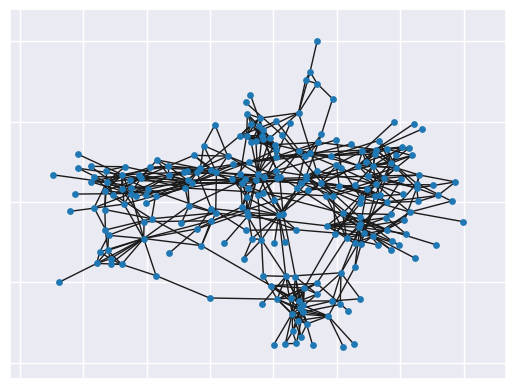

In [52]:
G1 = nx.from_numpy_array(adyacencia)
grafo=nx.draw_networkx(G1,with_labels=False,node_size=15)

In [53]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


#### Distribucion de grados de la red de numeros

In [54]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
listdegree1=list(degree)
degree1

,0,1
0,0,8
1,1,3
2,2,14
3,3,2
4,4,10
...,...,...
231,231,12
232,232,1
233,233,7
234,234,4


#### Distribucion de grados de la red animal

In [55]:
degreeani=nx.degree(G)
degree1ani=pd.DataFrame(degreeani)
#listdegree1ani=list(degreeani)
#degree2ani=pd.DataFrame(listdegree1ani, dtype = np.float64)
degree1ani

,0,1
0,abeja,8
1,abejorro,3
2,aguila,14
3,aguilucho,2
4,arana,10
...,...,...
231,vaca,12
232,verderol,1
233,vibora,7
234,yegua,4


#### Grado medio

In [56]:
#Grado medio
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

#### frecuencias de cada grado

In [57]:
f=pd.value_counts(degree1.iloc[:,1])
f

1
1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: count, dtype: int64

### Coeficiente de Clustering

In [58]:
coef_clustering=nx.average_clustering(G1)
coef_clustering

0.3296154175391464

### Red graficada con clusters

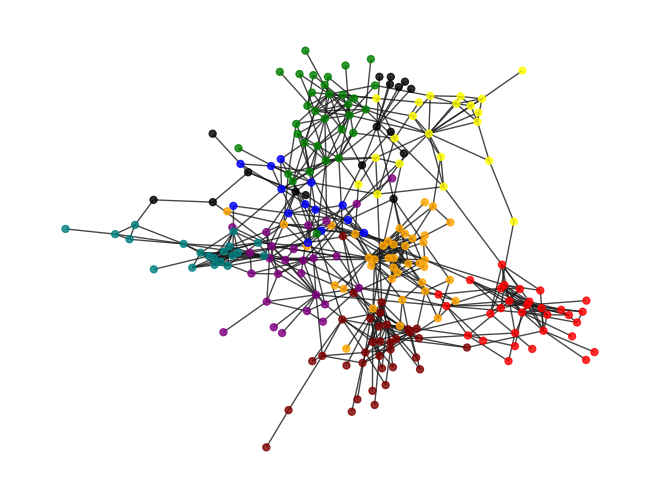

In [59]:
cluster=community_louvain.best_partition(G1)
unique_coms = np.unique(list(cluster.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster[node]] for node in G1.nodes()]
nx.draw(G1, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

<Axes: >

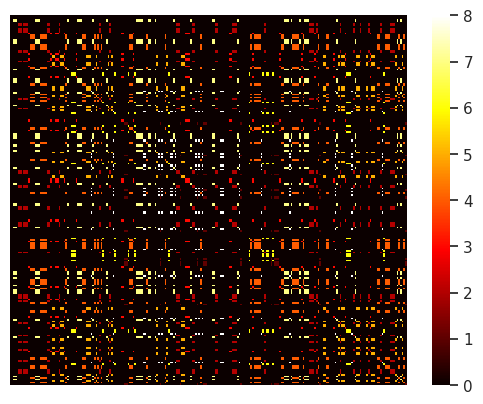

In [60]:
mascara = np.zeros_like(adyacencia)
for i, cluster_i in cluster.items():
    for j, cluster_j in cluster.items():
        if cluster_i == cluster_j:
            mascara[i, j] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mascara, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)


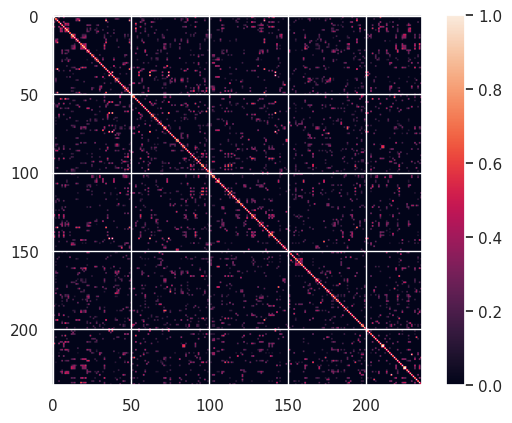

In [61]:
cosine_sim_matrix = cosine_similarity(adyacencia)
plt.imshow(cosine_sim_matrix)
plt.colorbar()

### camino mas corto promedio

In [62]:
caminomcort=nx.average_shortest_path_length(G1)
caminomcort

4.4232960692390915

Text(0.5, 1.0, 'Histograma de frecuencias de grado')

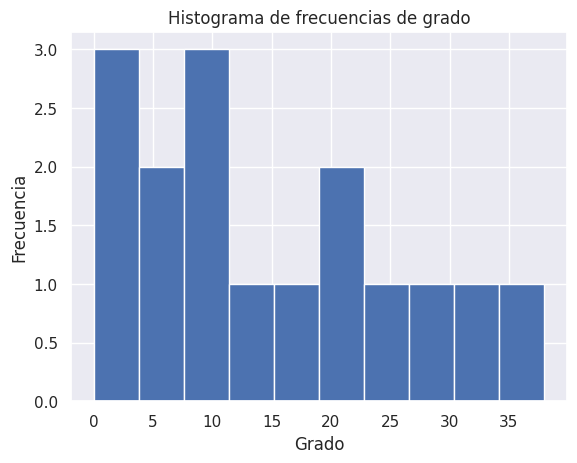

In [63]:
hist=nx.degree_histogram(G1)
plt.hist(hist)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de grado')

La red tiene un camino mas corto promedio de 4.423, un coeficiente de clustering promedio de 0.329, del histograma anterior se puede ver que existen pocos nodos con alto grado, mientras que hay muchos con un grado bajo, esto deja a una red de tipo small-world. wattz-strogatz 1988.

## BUSQUEDA POR GRADO DE NODO

In [64]:
#funcion de busqueda
def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    walked_nodes = [current_node]
    while len(walked_nodes) < nx.number_of_nodes(G1): #nx.number_of_nodes(G1)
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes

In [65]:
nodo=0
 #pasos en la red
i=0 #contador para matriz
matrix=[] #matriz de resultados
while i < nx.number_of_nodes(G1): #ciclo que crea la matriz nx.number_of_nodes(G1)
    while nodo < nx.number_of_nodes(G1): #ciclo que recorre la red nx.number_of_nodes(G1)+1
        pp=walked_nodes_by_degree_prob(G1,nodo)
        nodo+=1
        matrix.append(pp) #añade las listas a la matriz
        i+=1
newmatrix=np.delete(matrix,0,axis=1) #quita la primera columna
#arreglouni=np.ravel(newmatrix)#convierte la mattriz a un arreglo unidimension
#valores,frecuencia=np.unique(arreglouni,return_counts=True)#cal val,frec
#tabla=[valores,frecuencia]#tabula
#dataf=pd.DataFrame(tabla)#dataframe
matrixDF=pd.DataFrame(newmatrix)
matrixDF.to_csv("matrizF.csv")
response=matrixDF.to_numpy()

In [66]:
unique_values, counts = np.unique(newmatrix, return_counts=True)


In [67]:
elementoi=unique_values
arreglo=list(G.nodes())
palabra=[]
for elemento in elementoi:
   palabra.append(arreglo[elemento])
#listapalabra=np.reshape(palabra,(1,-1))
frecuenciapalabra=[palabra,counts]
frecuenciapalabraDF=pd.DataFrame(frecuenciapalabra)
frecuenciapalabraDF


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,abeja,abejorro,aguila,aguilucho,arana,arenque,atun,avispa,bacalao,barbo,...,tortuga,trucha,lucio,tucan,urogallo,vaca,verderol,vibora,yegua,zorro
1,509,82,931,46,650,11,673,406,74,252,...,98,1238,9,19,3,1046,7,292,141,127


In [68]:
g = nx.Graph()

# Itera sobre todas las filas de la matriz de caminata
for row in response:
    # Crea una lista de aristas conectando nodos consecutivos en la fila
    edges = [(row[i], row[i+1]) for i in range(len(row)-1)]
    # Agrega las aristas al grafo
    g.add_edges_from(edges)

# Muestra el grafo resultante
#nx.draw(g, with_labels=False,node_size=15)
adj1=nx.adjacency_matrix(g).todense()
adj1DF=pd.DataFrame(adj1)

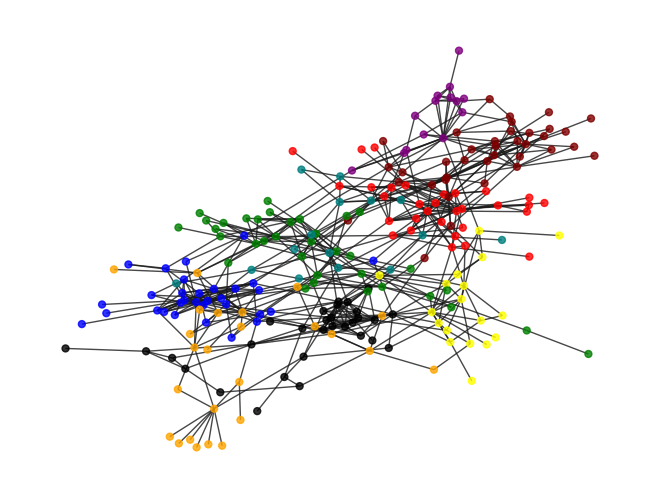

In [69]:
cluster1=community_louvain.best_partition(g)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g.nodes()]
nx.draw(g, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

<Axes: >

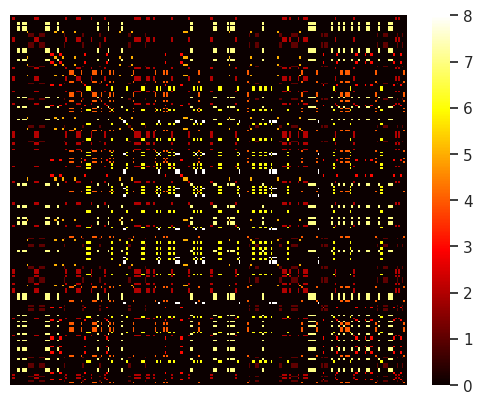

In [70]:
mask = np.zeros_like(adj1DF)
for i, cluster_i in cluster1.items():
    for j, cluster_j in cluster1.items():
        if cluster_i == cluster_j:
            mask[i-1, j-1] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mask, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

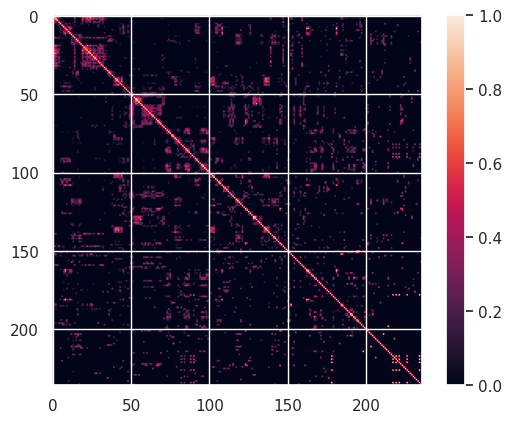

In [71]:
cosine_sim_matrix1 = cosine_similarity(adj1)
plt.imshow(cosine_sim_matrix1)
plt.colorbar()

Text(0.5, 1.0, 'Histograma de frecuencias de grado')

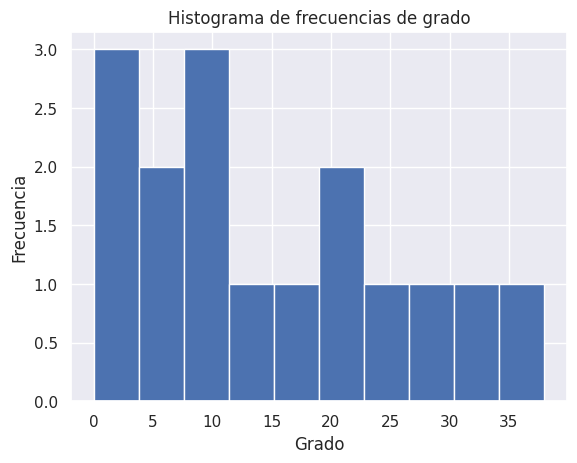

In [72]:
hist1=nx.degree_histogram(g)
plt.hist(hist1)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de grado')

In [73]:
coef_clusteringg=nx.average_clustering(g)
coef_clusteringg

0.32961541753914636

### Aplicacion cadenas de markov srw+

In [74]:
def SRW(p,mc,ms):
    return p*ms+(1-p)*mc

In [152]:
sum_fila=np.sum(DFadj, axis=1)
TransMatrix=adyacencia/adyacencia.sum(axis=1,keepdims=True)
TransMatrixDF=pd.DataFrame(TransMatrix)
TransMatrixDF.to_csv('transitionM.csv')
T=TransMatrixDF.to_numpy()


In [153]:
degree = adyacencia.sum(axis=1)
sum_degree = degree.sum()
transition_matrix = degree / sum_degree
transition_matrix = transition_matrix.reshape((-1, 1)) * np.ones(adyacencia.shape)

Corregir esta celda por que hay un problema con a indexacion de la matriz que se va a obtener, la verdad no se que puede ser pues las dimensiones son las mismas que en el caso siguiente

In [158]:
p=0.05
m1=SRW(p,T,transition_matrix)
autovalores, autovectores = sp.linalg.eig(m1.T)
autovalores


array([ 1.02117905e+00+0.00000000e+00j, -8.26364976e-01+0.00000000e+00j,
       -7.50923028e-01+0.00000000e+00j, -7.48446208e-01+0.00000000e+00j,
        9.14332460e-01+0.00000000e+00j,  9.11139226e-01+0.00000000e+00j,
        8.93263465e-01+0.00000000e+00j,  8.64134776e-01+0.00000000e+00j,
        8.44218060e-01+0.00000000e+00j,  8.32448887e-01+0.00000000e+00j,
        8.20884293e-01+0.00000000e+00j,  8.14644297e-01+0.00000000e+00j,
        7.84462550e-01+0.00000000e+00j,  7.72564727e-01+0.00000000e+00j,
        7.50190981e-01+0.00000000e+00j,  7.24633350e-01+0.00000000e+00j,
        7.05585171e-01+0.00000000e+00j,  6.98513908e-01+0.00000000e+00j,
        6.65044154e-01+0.00000000e+00j,  6.58454125e-01+0.00000000e+00j,
        6.37889334e-01+0.00000000e+00j,  6.27673545e-01+0.00000000e+00j,
        6.19197596e-01+0.00000000e+00j,  6.11896247e-01+0.00000000e+00j,
        5.98560649e-01+0.00000000e+00j,  5.75750403e-01+0.00000000e+00j,
        5.89110268e-01+0.00000000e+00j, -6.54252148

# ALGORITMO DE BUSQUEDA CRW+PV

## RW

Para calcular un Random Wlaker es necesario obtener una matriz de transicion dada por:


$M_{ij}=\frac{L_{ij}}{\sum_{k=1}^{n}L_{kj}}$

El numerador es el grado del nodo, y $L$ la matriz de adyacencia.

In [78]:
sum_fila=np.sum(DFadj, axis=1)
TransMatrix=adyacencia/adyacencia.sum(axis=1,keepdims=True)
TransMatrixDF=pd.DataFrame(TransMatrix)
TransMatrixDF.to_csv('transitionM.csv')
T=TransMatrixDF.to_numpy()

In [79]:
Colsum=TransMatrixDF.sum(axis=0)
Colsum

0      0.996825
1      0.339286
2      3.497655
3      0.162338
4      1.795635
         ...   
231    1.450000
232    0.111111
233    1.590873
234    0.342857
235    1.080952
Length: 236, dtype: float64

In [80]:
Rowsum=TransMatrixDF.sum(axis=1)
Rowsum

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
Length: 236, dtype: float64

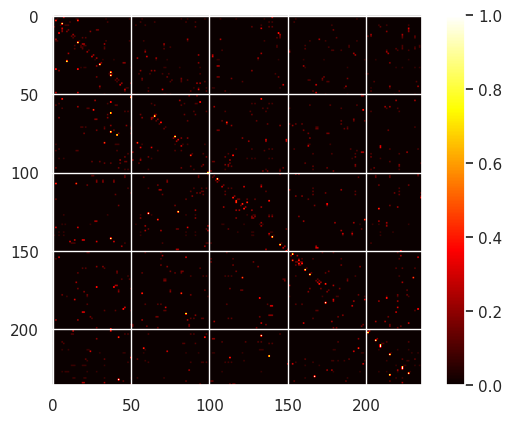

In [81]:
#Mapa de calor
plt.imshow(TransMatrixDF,cmap="hot",origin='upper')
plt.colorbar()

## Algoritmo random walk

In [82]:
def random_walk_censored(P, steps, start):
    visited = [start]
    curr = start
    for i in range(steps):
        curr = np.random.choice(np.arange(P.shape[0]), p=P[curr])
        if curr not in visited:
            visited.append(curr)
    return visited

In [83]:
n_walks = 1 # número de caminatas por nodo
walks_list = []
n=len(TransMatrix)
for start in range(n):
    walks = []
    for i in range(n_walks):
        walk = random_walk_censored(TransMatrix, 1000, start)
        walks.append(walk)
    walks_list.append(walks)
len(walks_list)

236

In [84]:
adj_matrix1 = np.zeros((236,236 ))
for node_walks in walks_list:
    for walk in node_walks:
        for i in range(len(walk)-1):
            adj_matrix1[walk[i], walk[i+1]] += 1
            adj_matrix1[walk[i+1], walk[i]] += 1

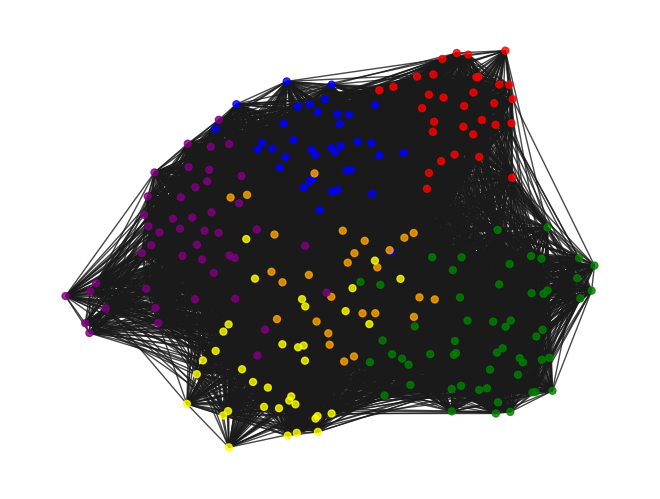

In [85]:
g1=nx.Graph(adj_matrix1)
cluster1=community_louvain.best_partition(g1)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g1.nodes()]
nx.draw(g1, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

In [86]:
coef_clusteringg=nx.average_clustering(g1)
coef_clusteringg

0.4670219864973864

In [87]:
p=0.05
start_node=235
num_steps=1000
walk = np.zeros_like(T)

for start_node in range(len(T)):
    # Comenzar la caminata aleatoria desde el nodo actual
    current_node = start_node
    for i in range(num_steps):
        # Calcular la probabilidad de moverse a cada nodo
        prob = T[current_node]

        # Incluir la probabilidad de saltar al nodo inicial
        prob[start_node] = p*prob[start_node] + (1 - p) * prob[start_node]

        # Escoger un nodo aleatorio según las probabilidades
        next_node = np.random.choice(np.arange(len(prob)), p=prob)

        # Actualizar el nodo actual
        current_node = next_node

        # Actualizar la matriz de caminata aleatoria
        walk[start_node, current_node] += 1
walk

array([[12.,  8., 10., ...,  2.,  1.,  1.],
       [ 9.,  4., 11., ...,  1.,  4.,  2.],
       [14.,  4., 18., ...,  4.,  2.,  7.],
       ...,
       [ 2.,  2.,  8., ...,  9.,  2.,  0.],
       [ 9.,  3., 26., ...,  7.,  3.,  3.],
       [ 3.,  2.,  9., ...,  2.,  5., 10.]])

In [88]:
num_steps=235
random_walks = np.zeros((235, num_steps))
p=0.05
# Recorrer los nodos iniciales del 0 al 236
for current_node in range(235):
    # Inicializar la posición actual del random walk
    node = current_node
    
    # Realizar el random walk
    for i in range(num_steps):
        # Calcular las probabilidades de movimiento
        neighbor_probabilities = T[node]
        jump_probability = np.ones(len(T)) / len(T)
        probabilities = (1 - p) * neighbor_probabilities + p * jump_probability

        # Elegir el siguiente nodo al azar
        next_node = np.random.choice(len(T), p=probabilities)

        # Actualizar la posición actual del random walk
        node = next_node
        
        # Guardar el resultado del random walk en la matriz
        random_walks[current_node, i] = node

In [89]:
g = nx.Graph()

# Itera sobre todas las filas de la matriz de caminata
for row in random_walks:
    # Crea una lista de aristas conectando nodos consecutivos en la fila
    edges = [(row[i], row[i+1]) for i in range(len(row)-1)]
    # Agrega las aristas al grafo
    g.add_edges_from(edges)

# Muestra el grafo resultante
#nx.draw(g, with_labels=False,node_size=15)
adj1=nx.adjacency_matrix(g).todense()
adj1DF=pd.DataFrame(adj1)

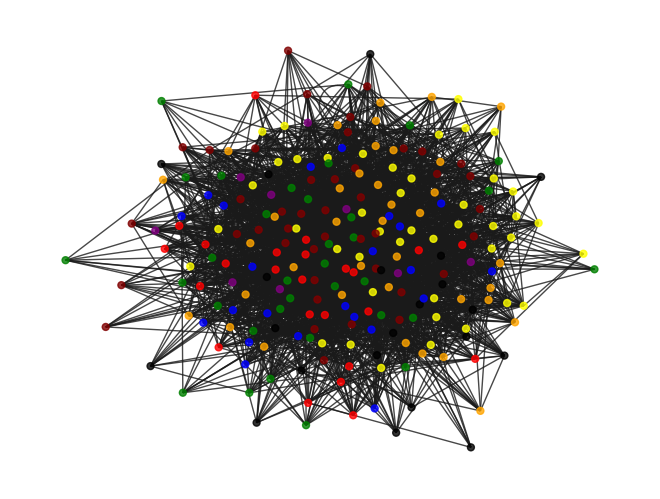

In [90]:
g2=nx.from_numpy_array(adj1)
cluster1=community_louvain.best_partition(g2)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g2.nodes()]
nx.draw(g2, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

<Axes: >

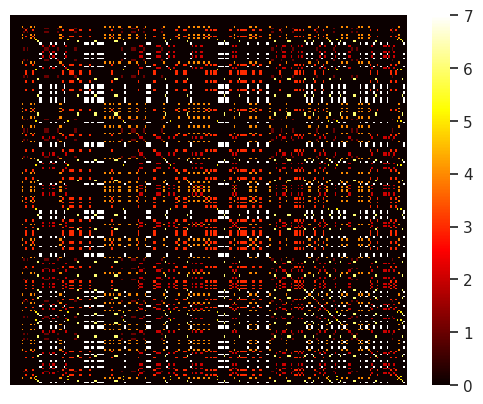

In [91]:
mask = np.zeros_like(adj1)
for i, cluster_i in cluster1.items():
    for j, cluster_j in cluster1.items():
        if cluster_i == cluster_j:
            mask[i-1, j-1] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mask, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

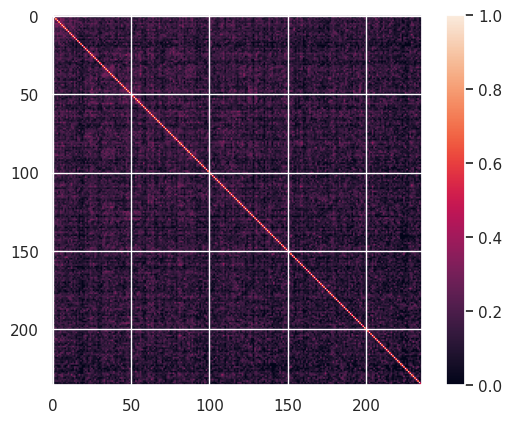

In [92]:
cosine_sim_matrix1 = cosine_similarity(adj1)
plt.imshow(cosine_sim_matrix1)
plt.colorbar()

## aplicando redes de markov

In [93]:
def SRW(p,mc,ms):
    return p*ms+(1-p)*mc

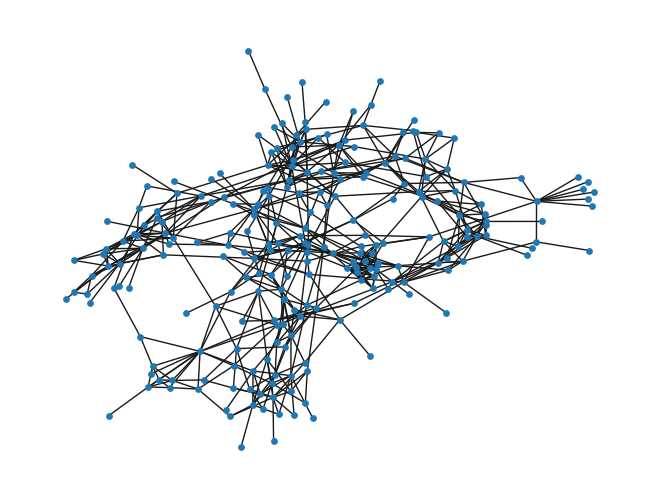

In [160]:
A= np.full((236, 236), 1/236)
p=0.05
m1=SRW(p,T,A)
autovalores, autovectores = np.linalg.eig(m1.T)
idx = np.where(np.isclose(autovalores, 1))[0][0]
estados_estacionarios = autovectores[:, idx] / np.sum(autovectores[:, idx])
def umbral(x):
    return 1 if x >= 0.1 else 0

# Aplicar la función de umbral a cada elemento de la matriz
A_ady = np.where(m1 >= 0.1, 1, 0)
g3=nx.from_numpy_array(A_ady)
nx.draw(g3,node_size=15)

(array([5., 1., 0., 1., 0., 2., 2., 2., 1., 1.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

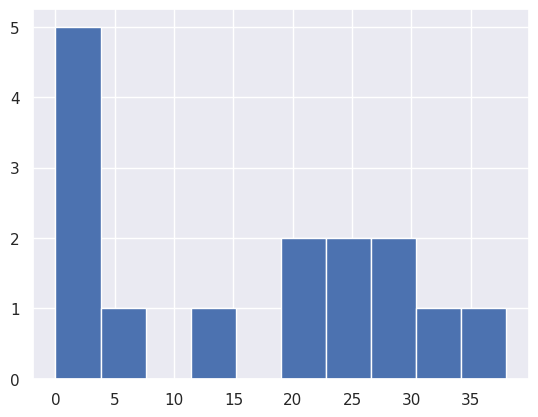

In [95]:
plt.hist(nx.degree_histogram(g3))

In [96]:
nx.average_clustering(g3)
nx.average_shortest_path_length(g3)

4.5653443923548505

In [97]:
4.4232960692390915-4.5653443923548505



-0.142048323115759

<Axes: >

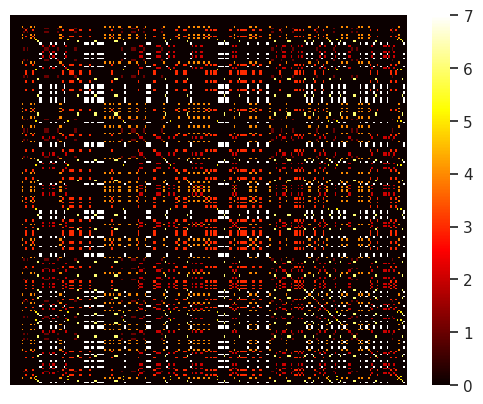

In [98]:
mask = np.zeros_like(A_ady)
for i, cluster_i in cluster1.items():
    for j, cluster_j in cluster1.items():
        if cluster_i == cluster_j:
            mask[i-1, j-1] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mask, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

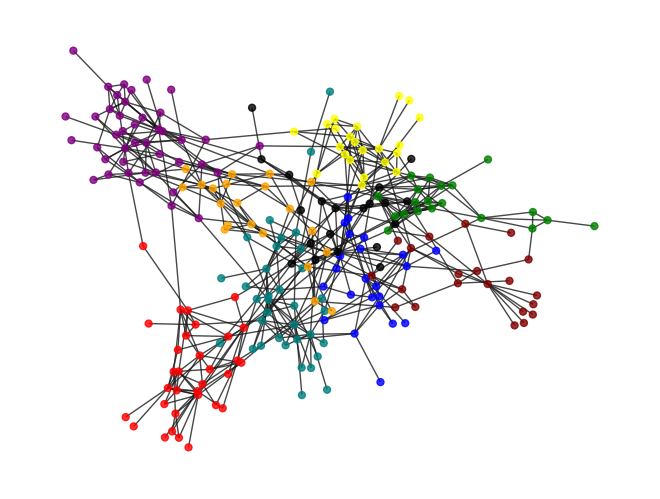

In [99]:
cluster1=community_louvain.best_partition(g3)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g3.nodes()]
nx.draw(g3, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

In [100]:
nx.number_of_edges(g3)

558

In [101]:
nx.number_of_nodes(g3)

236